In [25]:
# Importer les bibliothèque servant à nettoyer et visualiser les datas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Importer l'outil de mise a l'échelle "standard scaler" pour normaliser les data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [26]:
df = pd.read_csv("C:\\Users\\Pierre\\Desktop\\Projet_Jedha\\Beer_Dataset\\beer_profile_and_ratings.csv")

In [27]:
print("EXPLORATORY DATA ANALYSIS")

EXPLORATORY DATA ANALYSIS


In [28]:
df.shape

(3197, 25)

In [29]:
df.sample(5)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
88,Bligh's Barleywine Ale,Barleywine - English,Dry Dock Brewing Co.,Dry Dock Brewing Co. Bligh's Barleywine Ale,"Notes:Malty and complex, this big beer has a s...",10.0,40,60,4,62,...,46,7,18,96,4.440000,4.070000,4.230000,4.500000,4.450000,50
2502,Cappuccino Stout,Stout - American Imperial,Lagunitas Brewing Company,Lagunitas Brewing Company Cappuccino Stout,Notes:For That Extra KrunkCoffee is my shepher...,9.2,50,80,6,83,...,6,30,2,116,3.801099,3.843956,3.778022,3.891758,3.852198,910
1566,Mac Queen's Nessie,Lager - Vienna,Brauerei Schloss Eggenberg,Brauerei Schloss Eggenberg Mac Queen's Nessie,"Notes:Note: New recipe from 2008, gravity went...",5.0,15,30,16,45,...,30,44,21,113,3.252577,3.319588,3.319588,3.237113,3.293814,97
1059,Birra Peroni,Lager - Adjunct,Birra Peroni Industriale S.p.A.,Birra Peroni Industriale S.p.A. Birra Peroni,Notes:,4.7,8,18,21,24,...,3,33,2,41,2.625000,2.750000,2.750000,2.500000,2.625000,4
1707,Pabst Blue Ribbon Non-Alcoholic,Low Alcohol Beer,Pabst Brewing Company,Pabst Brewing Company Pabst Non-Alcoholic,Notes:Formerly Pabst NA\t,0.5,10,20,14,22,...,5,18,0,15,2.583333,2.583333,2.458333,2.666667,2.958333,12


In [30]:
# Utilisation de describe uniquement pour les données numériques
print(df.describe(include=[np.number]))

               ABV      Min IBU      Max IBU  Astringency         Body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           Alcohol       Bitter        Sweet         Sour        Salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0

In [31]:
# Affiche la somme des valeurs dupliquées dans le DataFrame
print('Somme des valeurs dupliquées : ', df.duplicated().sum())

# Affiche la somme des valeurs NaN (manquantes) dans le DataFrame
print('Somme des valeurs NaN : ', df.isna().sum().sum())

# Affiche la somme des valeurs nulles dans le DataFrame
print('Somme des valeurs nulles : ', df.isnull().sum().sum(), '\n')

# Affiche un résumé des informations du DataFrame
df.info()

Somme des valeurs dupliquées :  0
Somme des valeurs NaN :  0
Somme des valeurs nulles :  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non

ANALYSE DE LA DISTRIBUTION DE CHAQUE VARIABLE

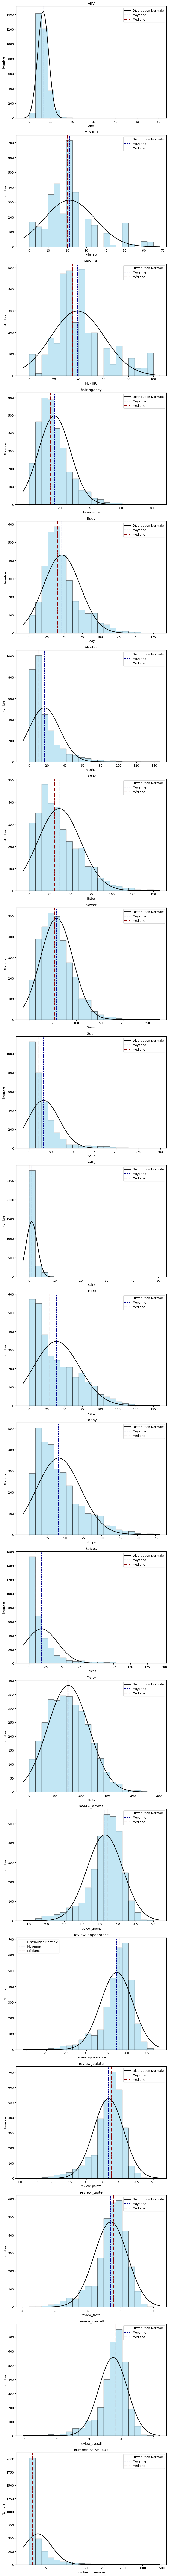

In [32]:
# Filtrer les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=['int64', 'float64']).columns

# Créer des sous-graphiques séparés pour chaque histogramme
fig, axs = plt.subplots(nrows=len(colonnes_numeriques), ncols=1, figsize=(8, 6 * len(colonnes_numeriques)))

# Tracer les histogrammes et ajouter les lignes de moyenne et de médiane
for i, colonne in enumerate(colonnes_numeriques):
    ax = axs[i]
    donnees = df[colonne]
    n, bins, _ = ax.hist(donnees, bins=20, alpha=0.5, color='skyblue', edgecolor='black')
    
    # Ajuster une distribution normale aux données
    mu, std = norm.fit(donnees)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    # Mettre à l'échelle la distribution normale pour correspondre à l'histogramme
    facteur_echelle = np.sum(n) * np.diff(bins)[0]  # Nombre total de points de données fois largeur d'un seul bin
    ax.plot(x, p * facteur_echelle, 'k', linewidth=2, label='Distribution Normale')
    
    # Ajouter les lignes de moyenne et de médiane
    valeur_moyenne = donnees.mean()
    valeur_mediane = donnees.median()
    ax.axvline(valeur_moyenne, color='darkblue', linestyle='--', label='Moyenne')
    ax.axvline(valeur_mediane, color='darkred', linestyle='-.', label='Médiane')
    
    # Définir le titre et les étiquettes
    ax.set_title(f'{colonne}')
    ax.set_xlabel(colonne)
    ax.set_ylabel("Nombre")
    
    # Ajouter une légende
    ax.legend()

plt.tight_layout()
plt.show()


OBSERVATIONS
La distribution des différentes variables semblent suivre une distribution normale. On le voit à l'aspect gaussien (en forme de cloche) avec proche du sommet la moyenne et la médiane. 

Remarques: 
- Salty: semble suivre une évolution exponentielle.
- L'ensemble des critiques "review" sont suffisamment décrites en prenant les notes comprises entre 2.5 et 4.5.

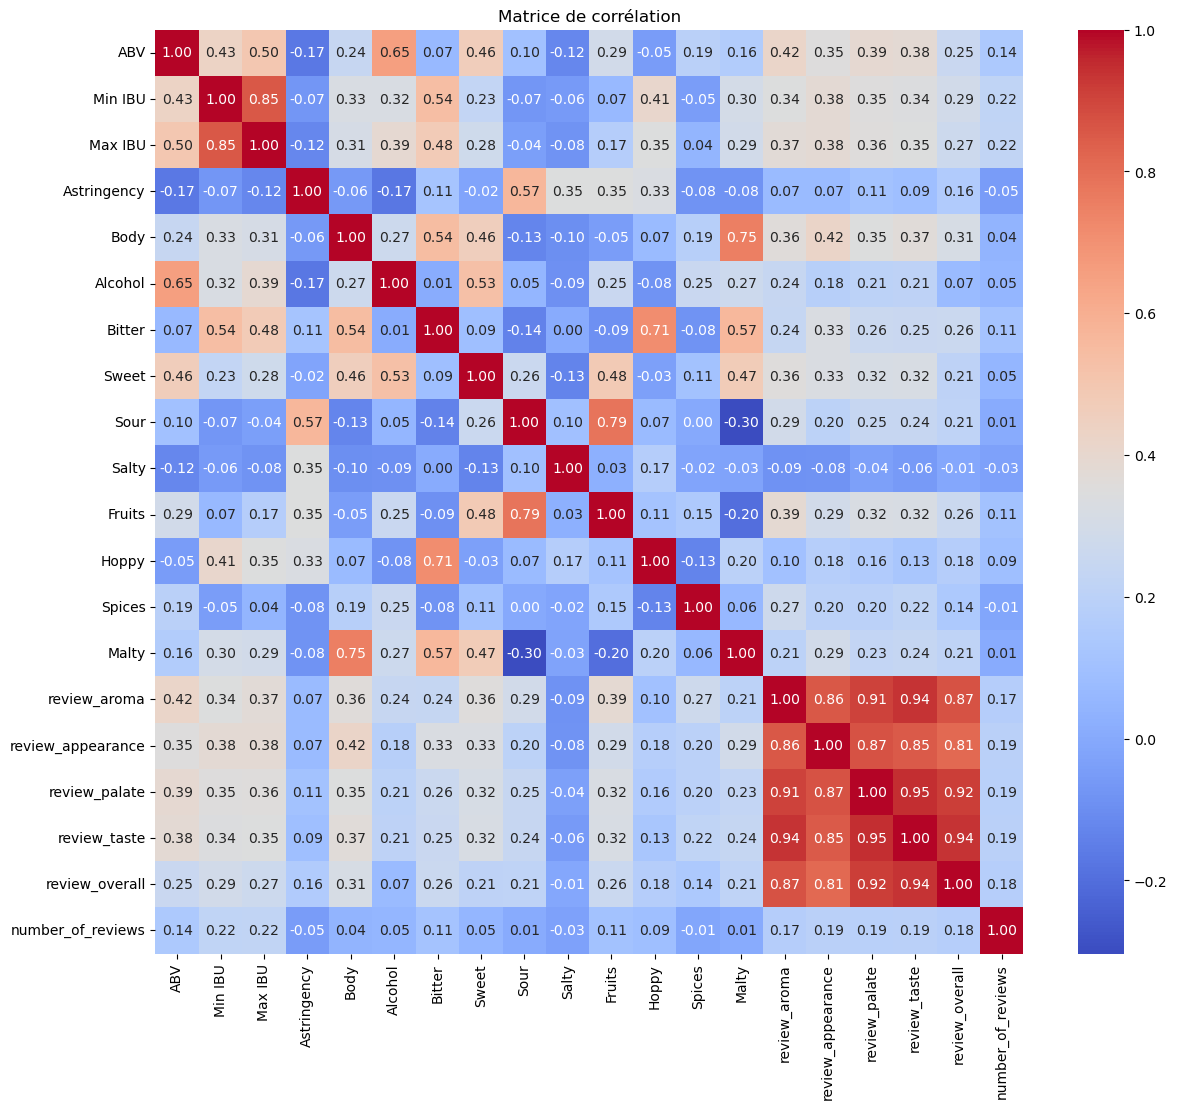

In [33]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


Observations

On peut observer que le paramètre goût "Alcohol" est fortement corrélé avec le taux alcoolique "ABV". Cette observation est logique et permet d'estimer la cohérence des notes attribuées par les juges.
De la même manière nous voyons une corrélation entre :
 
    - Bitter et Min IBU, Max IBU et Body
    - Sour et Astringency
    - Fruits et Sour
    - Hoppy et Bitter
    - Malty et Body

La matrice de corrélation nous montre que les différentes notes: review aroma, taste, palate et overall sont fortement corrélées. C'est à dire que lorsque le consommateur donne une bonne note pour l'arôme, le goût ou le palais, il y a de fortes chances que la note globale soit également bonne. Nous pouvons donc simplifier le tableau de données en ne prenant en compte que la note globale review_overall.

En revanche, de premier abord, il semble y avoir une absence de corrélation évidente entre un des descripteurs et la note donnée par le consommateur.Plusieurs facteurs pourraient donc participer à la note globale de la bière. 

Pour la suite du projet, et pour simplifier l'élaboration d'un modèle, le dataset a  été réduit aux colonnes : Astringency, Alcohol, Bitter, Sweet, Salty, Fruits, Hoppy, Spices, Malty, Review Overall



In [34]:
# Sélection des colonnes désirées
colonnes_desirees = ['Astringency','Alcohol','Bitter', 'Sweet', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'review_overall']
df_filtre = df[colonnes_desirees]

# Supprimer les lignes avec review_overall < 2.5 ou > 4.5
df_filtre = df_filtre[(df_filtre['review_overall'] > 2.5) & (df_filtre['review_overall'] <= 4.5)]

# Afficher le DataFrame filtré
print(df_filtre)


      Astringency  Alcohol  Bitter  Sweet  Salty  Fruits  Hoppy  Spices  \
0              13        9      47     74      0      33     57       8   
1              12       18      33     55      0      24     35      12   
2              14        6      42     43      0      10     54       4   
3              13       31      47    101      1      49     40      16   
4              25       26      44     45      1      11     51      20   
...           ...      ...     ...    ...    ...     ...    ...     ...   
3192           15       24      35     46      0      23     45      67   
3193           15       23      16     54      0      54     14     140   
3194            8       24      19     52      0      26     21      96   
3195           11       50      70     72      0      81    110      18   
3196            8       49      13     71      0      33     16     148   

      Malty  review_overall  
0       111        3.847082  
1        84        4.034304  
2        

Elaboration d'un arbre de décisions type "Random Forests"

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Définir les caractéristiques (X) et la variable cible (y)
X = df_filtre.drop(columns=['review_overall'])
y = df_filtre['review_overall']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser et ajuster le Régresseur de Forêt Aléatoire
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf_regressor.predict(X_test_scaled)



Evaluation du modèle

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.09997175183354817
Mean Absolute Error: 0.24418969301453927
R-squared: 0.28789079992600786


Optimisation des hyperparamètres pour améliorer la régression R²

In [37]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 75, 100],
    'min_samples_split': [5, 100],
    'min_samples_leaf': [5, 100]
}

# Initialiser le modèle de RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajuster GridSearchCV aux données d'entraînement
grid_search.fit(X_train_scaled, y_train)

# Obtenir les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Utiliser les meilleurs hyperparamètres pour ajuster le modèle RandomForestRegressor
best_rf_regressor = RandomForestRegressor(random_state=42, **best_params)
best_rf_regressor.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test avec le meilleur modèle
y_pred = best_rf_regressor.predict(X_test_scaled)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les métriques d'évaluation
print("Erreur quadratique moyenne :", mse)
print("Erreur absolue moyenne :", mae)
print("R-carré :", r2)
print("Meilleurs hyperparamètres trouvés :", best_params)


Erreur quadratique moyenne : 0.09871554063332616
Erreur absolue moyenne : 0.2423204035480619
R-carré : 0.29683892313588733
Meilleurs hyperparamètres trouvés : {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


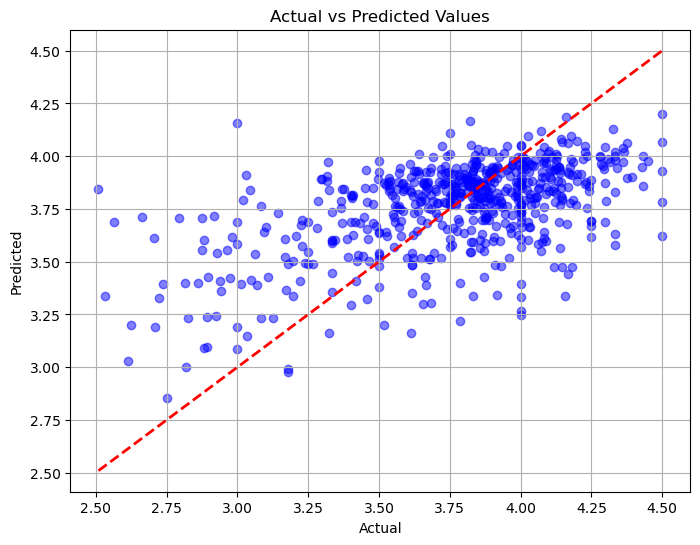

In [38]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


Importance des différentes variables

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Définir les caractéristiques (X) et la variable cible (y)
X = df_filtre.drop(columns=['review_overall'])
y = df_filtre['review_overall']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser et ajuster le Régresseur de Forêt Aléatoire avec min_samples_split et min_samples_leaf
rf_regressor = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=5, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_regressor.predict(X_test_scaled)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les métriques d'évaluation
print("Erreur quadratique moyenne :", mse)
print("Erreur absolue moyenne :", mae)
print("R-carré :", r2)

# Obtenir les caractéristiques les plus importantes
feature_importance = rf_regressor.feature_importances_

# Créer une DataFrame pour visualiser les caractéristiques importantes
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Trier les caractéristiques par ordre d'importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques les plus importantes
print(feature_importance_df)



Erreur quadratique moyenne : 0.09871554063332616
Erreur absolue moyenne : 0.2423204035480619
R-carré : 0.29683892313588733
       Feature  Importance
7       Spices    0.202859
2       Bitter    0.152361
8        Malty    0.148429
5       Fruits    0.131739
1      Alcohol    0.099677
3        Sweet    0.086366
0  Astringency    0.083923
6        Hoppy    0.074579
4        Salty    0.020067


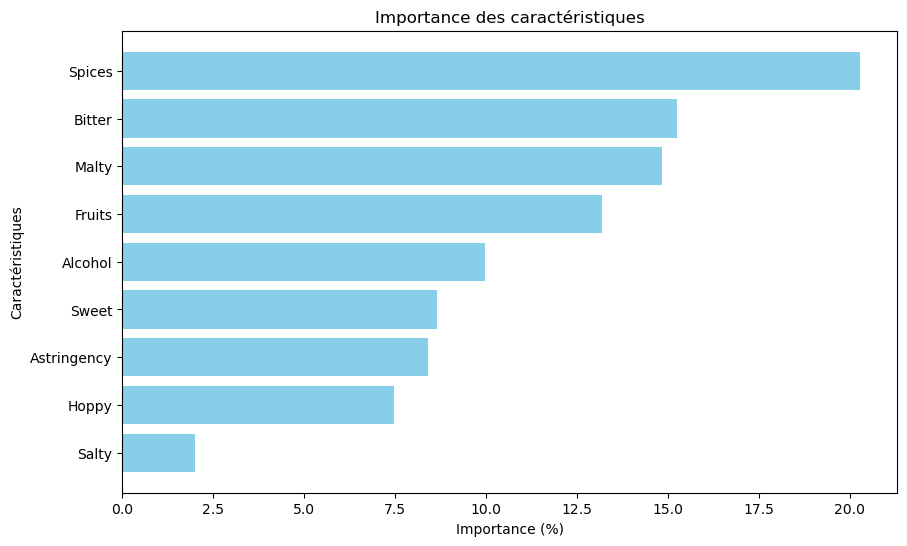

In [40]:
# Convertir les coefficients d'importance en pourcentage
feature_importance_df['Importance (%)'] = feature_importance_df['Importance'] * 100

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance (%)')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les caractéristiques les plus importantes en haut
plt.show()
